**clicks are major sources of revenue Indeed.com, but they are also metrics of job visibility which is in the interest of companies that post jobs on Indeed.com.**

## Import Major Libraries and Load in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:\josh_data_science\Vassar Datafest 2018\Dataset_and_FeatureDictionary\indeed_cleaned.csv', encoding='cp1252')

In [3]:
del df['Unnamed: 0']

In [4]:
df.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks
0,2016-11-01,company00019,job0000020,US,CO,Palmer Lake,0.0,0.0,UNKNOWN,handy man,...,3.0,45700,USD,EN,0.0,1.0,None,99,21,2
1,2016-11-02,company00019,job0000020,US,CO,Palmer Lake,0.0,0.0,UNKNOWN,handy man,...,3.0,45700,USD,EN,0.0,1.0,None,100,18,2
2,2016-11-02,company00022,job0000023,US,PA,Pittsburgh,3.5,50.0,CONSTRUCTION,plumber,...,5.0,58900,USD,EN,0.0,1.0,None,99,19,3
3,2016-11-01,company00023,job0000024,US,FL,Miami,0.0,0.0,UNKNOWN,staffing coordinator,...,1.0,33800,USD,EN,1.0,1.0,High School,98,20,20
4,2016-11-01,company00027,job0000028,CA,ON,Innisfil,0.0,0.0,UNKNOWN,senior consultant,...,5.0,83400,CAD,EN,0.0,1.0,Higher Education,99,23,3


## Checking Assumptions for the count data (Y-variable)

In [5]:
df.clicks.value_counts()

26      498724
24      495392
25      494167
23      490593
22      490458
21      486640
20      485677
18      480378
19      480237
17      474300
16      473040
14      466609
15      465455
13      455180
12      453714
10      442208
11      441700
9       425268
8       423748
7       400953
6       400356
5       366839
4       366531
2       314497
3       313693
28      286374
27      282682
1       216386
0       214887
30      190605
         ...  
1608         1
1610         1
1612         1
1126         1
1691         1
1687         1
1683         1
1102         1
1676         1
1673         1
1667         1
1664         1
1659         1
1658         1
1656         1
1655         1
1653         1
1650         1
1647         1
1646         1
1638         1
1635         1
1633         1
9314         1
1627         1
1621         1
1619         1
1617         1
1616         1
8032         1
Name: clicks, Length: 1827, dtype: int64

In [6]:
# Proportion Percentage of 0 counts (1.4%)
df.clicks.value_counts()[df.clicks.value_counts().index==0]*100/df.clicks.value_counts().sum()

0    1.473238
Name: clicks, dtype: float64

In [7]:
# Proportion Percentage of 0 counts
len(df.clicks.value_counts()[df.clicks.value_counts() < 30])*100/len(df.clicks.value_counts())

68.36343732895457

70% of the entire data comprise of clicks that are below 30. This skewness to the right can be found in the boxplot below.

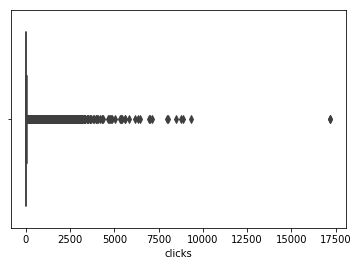

In [8]:
# Click numbers are extremely skewed to the right
sns.boxplot(df.clicks)

In [9]:
# Mean and Variance of Clicks
print("mean: ", df.clicks.mean(),"/", "variance: ", df.clicks.var())

mean:  22.44452539706644 / variance:  1265.5367674338947


In [10]:
# Chi Squared Model 
from scipy import stats
stats.chisquare(df.clicks)

Power_divergenceResult(statistic=822434958.75560188, pvalue=0.0)

There's overdispersion in the data, so negative binomial model would be better than general poisson model

In [11]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import NegativeBinomial
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

C:\Users\josh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
# Make a separate copy of df for machine learning models
df_for_ml = df.copy()

In [13]:
# Encoding categorical data

df_for_ml.drop(labels=['date'],axis=1,inplace=True)

lb_enc = LabelEncoder()

for col in ['companyId',
 'jobId',
 'country',
 'stateProvince',
 'city',
 'industry',
 'normTitle',
 'normTitleCategory',
 'salaryCurrency',
 'jobLanguage',
 'educationRequirements']:
    df_for_ml[col] = lb_enc.fit_transform(df_for_ml[col])

In [14]:
# Random Sampling : 10% of data
df_for_ml_10_perc_samp = df_for_ml.sample(frac=0.1)

In [15]:
y = df_for_ml_10_perc_samp[['clicks']]

In [16]:
del df_for_ml_10_perc_samp['clicks']

In [17]:
X = df_for_ml_10_perc_samp

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Negative Binomial Model

In [19]:
# # building the model
# nb = NegativeBinomial(y_train,X_train)
# nb_model = nb.fit(disp=False)

# # testing the model
# predVals = nb_model.predict(X_test)

In [20]:
# plt.figure(figsize=(8,5))
# plt.plot(range(len(y_test)), y_test, 'r*-', range(len(predVals)), predVals, 'bo-')
# plt.title('Train dataset Real vs. Predicted Values')
# plt.legend(['Real Values', 'Predicted Values'])

I will also use the random forest model and the gradient boost regressor to see which variables are most influential on clicks

###### Random Forest Regressor

In [21]:
rfr = RandomForestRegressor()
rfr.fit(X_train.as_matrix(), y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
mse = mean_squared_error(y_test.values.ravel(), rfr.predict(X_test.as_matrix()))
print("MSE: %.4f" % mse)
print("Squared Root of MSE:", np.sqrt(mse))

MSE: 617.5068
Squared Root of MSE: 24.8496847382


Text(0.5,1,'Variable Importance')

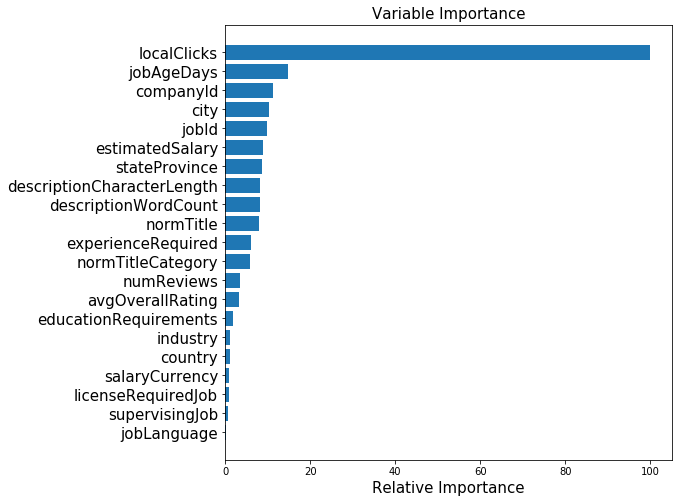

In [24]:
# Plot feature importance
feature_importance = rfr.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_for_ml_10_perc_samp.columns[sorted_idx], fontsize=15)
plt.xlabel('Relative Importance', fontsize=15)
plt.title('Variable Importance', fontsize=15)

##### Gradient Boosting Regressor

In [25]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [26]:
clf.fit(X_train.as_matrix(), y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [27]:
mse = mean_squared_error(y_test.values.ravel(), clf.predict(X_test.as_matrix()))
print("MSE: %.4f" % mse)
print("Squared Root of MSE:", np.sqrt(mse))

MSE: 562.9677
Squared Root of MSE: 23.7269402969


Text(0.5,1,'Variable Importance')

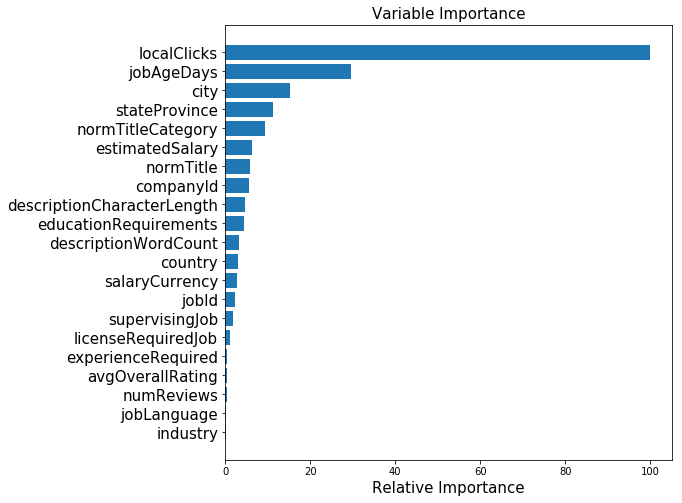

In [28]:
# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_for_ml_10_perc_samp.columns[sorted_idx], fontsize=15)
plt.xlabel('Relative Importance', fontsize=15)
plt.title('Variable Importance', fontsize=15)